In [27]:
# !pip install seaborn, matplotlib

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression     #can't  use since doesn't support multi-label classification problem
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [29]:
training_data=pd.read_excel(r"Final Data/final_training_data.xlsx")

In [30]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   respondent_id                26707 non-null  int64
 1   h1n1_concern                 26707 non-null  int64
 2   h1n1_knowledge               26707 non-null  int64
 3   behavioral_antiviral_meds    26707 non-null  int64
 4   behavioral_avoidance         26707 non-null  int64
 5   behavioral_face_mask         26707 non-null  int64
 6   behavioral_wash_hands        26707 non-null  int64
 7   behavioral_large_gatherings  26707 non-null  int64
 8   behavioral_outside_home      26707 non-null  int64
 9   behavioral_touch_face        26707 non-null  int64
 10  doctor_recc_h1n1             26707 non-null  int64
 11  doctor_recc_seasonal         26707 non-null  int64
 12  chronic_med_condition        26707 non-null  int64
 13  child_under_6_months         26707 non-null  i

In [31]:
training_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1,0,0,0,0,0,0,1,1,...,0,1,8,2,0,0,0,0,0,0
1,1,3,2,0,1,0,1,0,1,1,...,1,0,1,0,0,0,13,20,0,1
2,2,1,1,0,1,0,0,0,0,0,...,0,0,9,0,2,0,15,22,0,0
3,3,1,1,0,1,0,1,1,0,0,...,1,1,5,1,0,0,0,0,0,1
4,4,2,1,0,1,0,1,1,0,1,...,0,0,9,0,1,0,19,6,0,0


In [32]:
training_data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,36.057363,44.687011,26.630846,78.594376,7.182462,16.548957,32.929943,31.036769,48.596735,...,0.374920,0.656232,4.829745,0.833489,94.102894,93.754259,5.290710,6.242371,0.212454,0.465608
std,7709.791156,585.769779,657.478073,514.874267,878.930512,266.607037,396.186224,569.754574,553.193202,690.533223,...,0.622325,0.814312,2.805984,0.823313,960.902667,960.936641,7.079824,7.957241,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,7.000000,2.000000,1.000000,1.000000,9.000000,11.000000,0.000000,1.000000
max,26706.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,2.000000,3.000000,9.000000,2.000000,9999.000000,9999.000000,21.000000,23.000000,1.000000,1.000000


#### Checking the correlation in this case, makes sense because the variables are encoded with "Label encoders"

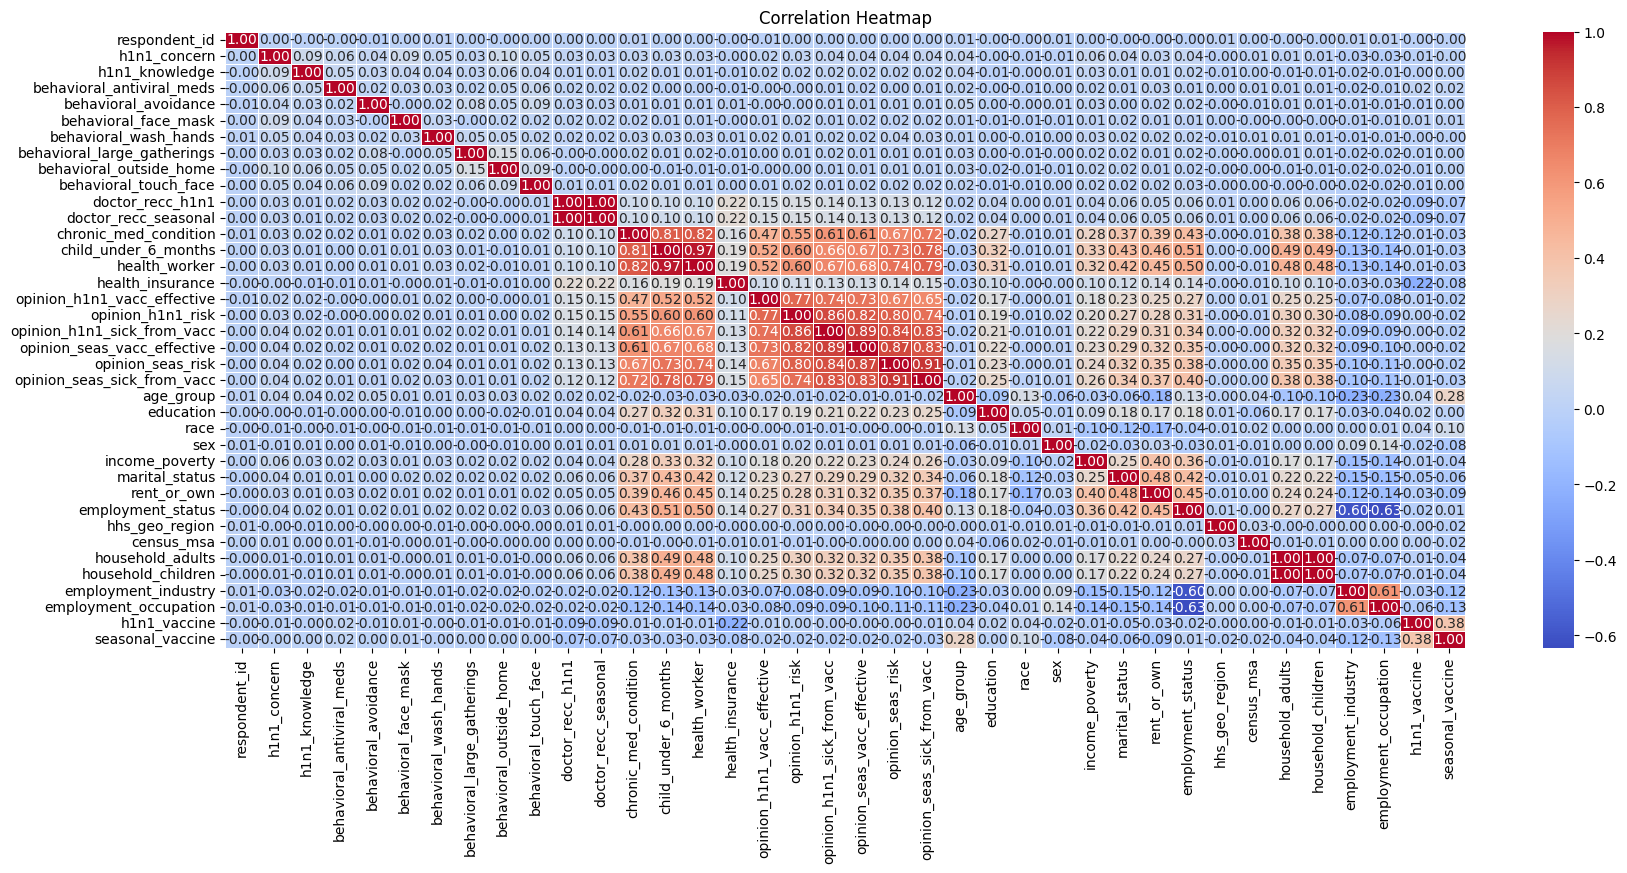

In [33]:
correlation_matrix = training_data.corr()

# Create the heatmap
plt.figure(figsize=(20, 8)) # Optional: Adjust figure size
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", # Format annotation values to two decimal places
            linewidths=.5) # Add lines between cells for better separation

plt.title('Correlation Heatmap')
plt.show()

In [34]:
# !pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = training_data.columns
vif_data['VIF'] = [variance_inflation_factor(training_data.values, i) for i in range(training_data.shape[1])]

print(vif_data)

                        feature           VIF
0                 respondent_id  3.614482e+00
1                  h1n1_concern  1.042663e+00
2                h1n1_knowledge  1.025213e+00
3     behavioral_antiviral_meds  1.018603e+00
4          behavioral_avoidance  1.028475e+00
5          behavioral_face_mask  1.014453e+00
6         behavioral_wash_hands  1.014688e+00
7   behavioral_large_gatherings  1.039378e+00
8       behavioral_outside_home  1.050973e+00
9         behavioral_touch_face  1.030885e+00
10             doctor_recc_h1n1  6.211656e+07
11         doctor_recc_seasonal  6.211801e+07
12        chronic_med_condition  3.292425e+00
13         child_under_6_months  1.838908e+01
14                health_worker  1.885135e+01
15             health_insurance  2.082966e+00
16  opinion_h1n1_vacc_effective  2.765153e+00
17            opinion_h1n1_risk  5.137138e+00
18  opinion_h1n1_sick_from_vacc  7.291281e+00
19  opinion_seas_vacc_effective  6.511584e+00
20            opinion_seas_risk  8

In [35]:
# doctor_recc_h1n1 and doctor_recc_seasonal both are identical : doctor recommendation to take the vaccine
# opinion_seas_sick_from_vacc and opinion_seas_risk are identical : respondent opinion whether they get sick after taking vaccine
# opinion_h1n1_sick_from_vacc and opinion_h1n1_risk are identical

# 'household_children','opinion_seas_sick_from_vacc','doctor_recc_seasonal',
training_data.drop(columns=["child_under_6_months","doctor_recc_seasonal","opinion_h1n1_sick_from_vacc","opinion_seas_sick_from_vacc","household_children"],axis=1,inplace=True)

In [36]:
# !pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = training_data.columns
vif_data['VIF'] = [variance_inflation_factor(training_data.values, i) for i in range(training_data.shape[1])]

print(vif_data)

                        feature       VIF
0                 respondent_id  3.610100
1                  h1n1_concern  1.042084
2                h1n1_knowledge  1.024669
3     behavioral_antiviral_meds  1.018129
4          behavioral_avoidance  1.027869
5          behavioral_face_mask  1.013720
6         behavioral_wash_hands  1.014287
7   behavioral_large_gatherings  1.037242
8       behavioral_outside_home  1.050802
9         behavioral_touch_face  1.030367
10             doctor_recc_h1n1  1.177253
11        chronic_med_condition  3.230502
12                health_worker  4.604421
13             health_insurance  2.078918
14  opinion_h1n1_vacc_effective  2.731821
15            opinion_h1n1_risk  4.197177
16  opinion_seas_vacc_effective  5.360072
17            opinion_seas_risk  5.473529
18                    age_group  3.736572
19                    education  3.638651
20                         race  7.050690
21                          sex  1.721850
22               income_poverty  2

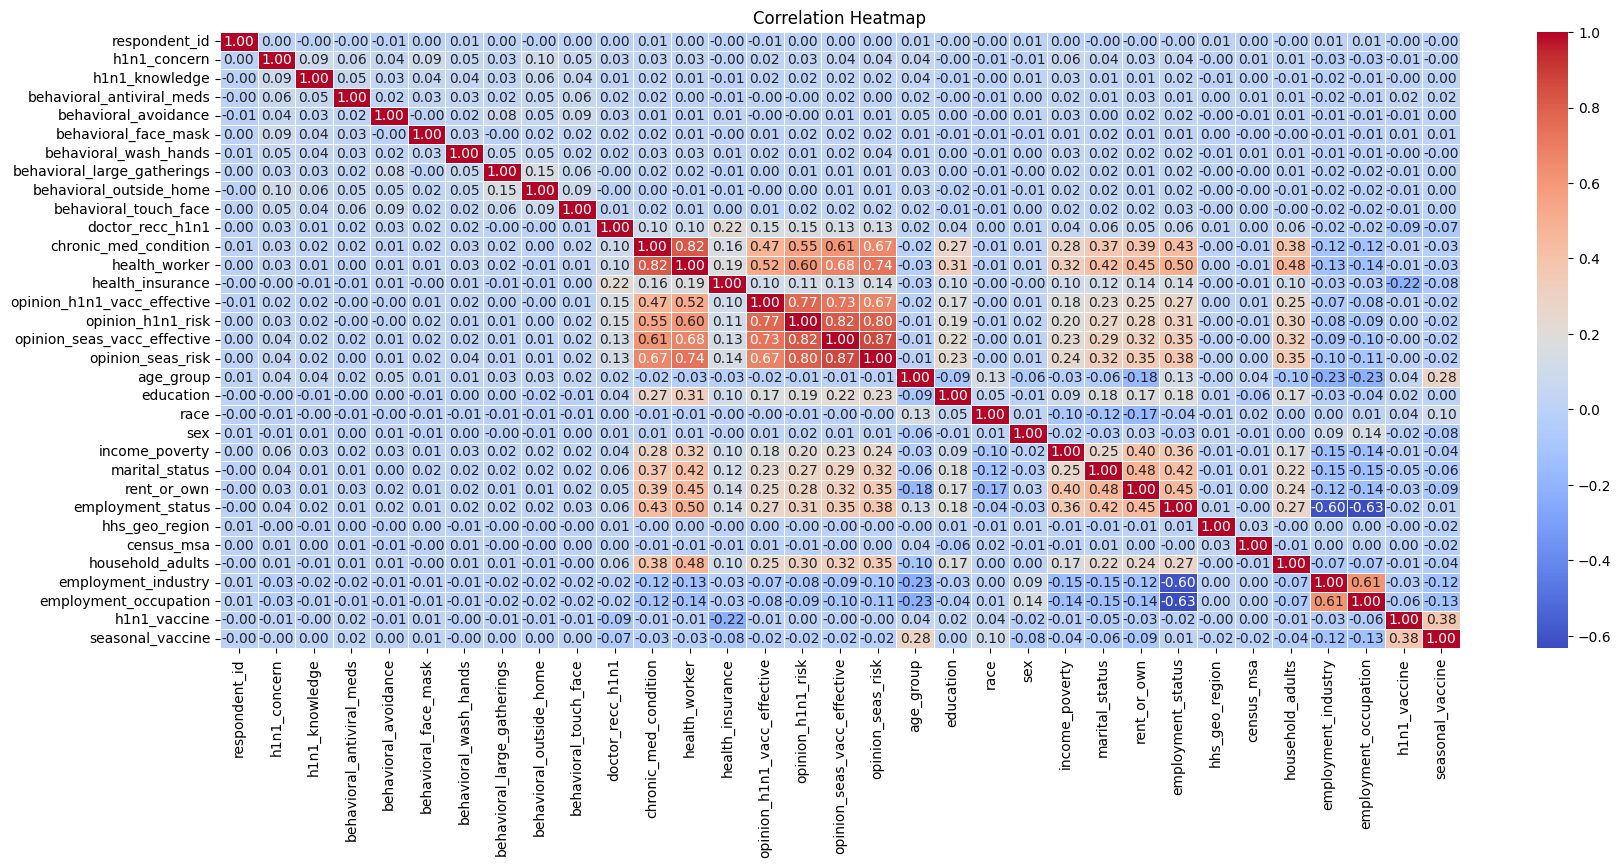

In [37]:
correlation_matrix = training_data.corr()

# Create the heatmap
plt.figure(figsize=(20, 8)) # Optional: Adjust figure size
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", # Format annotation values to two decimal places
            linewidths=.5) # Add lines between cells for better separation

plt.title('Correlation Heatmap')
plt.show()

#### Going ahead with the current choice of variables because even though pairwise correlation is high, the VIF is low meaning that the estimates of the variables doesn't have much variance in its estimates with the current set of variables

## Model training


In [41]:
training_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1,0,0,0,0,0,0,1,1,...,1,0,1,8,2,0,0,0,0,0
1,1,3,2,0,1,0,1,0,1,1,...,1,1,0,1,0,0,13,20,0,1
2,2,1,1,0,1,0,0,0,0,0,...,1,0,0,9,0,2,15,22,0,0
3,3,1,1,0,1,0,1,1,0,0,...,1,1,1,5,1,0,0,0,0,1
4,4,2,1,0,1,0,1,1,0,1,...,0,0,0,9,0,1,19,6,0,0


In [42]:
training_data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'household_adults', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [90]:
# Define the independent and dependent variables
X=training_data.drop(["h1n1_vaccine","seasonal_vaccine"],axis=1)
# y=np.c_[training_data["h1n1_vaccine"],training_data["seasonal_vaccine"]]
y=training_data[["h1n1_vaccine","seasonal_vaccine"]]
# split the set to training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [103]:
rf_clf = RandomForestClassifier(n_estimators=200,random_state=0).fit(X_train, y_train)

In [104]:
y_pred=rf_clf.predict_proba(X_test)

In [105]:
y_score = np.transpose([score[:, 1] for score in y_pred])


In [106]:
roc_auc_score(y_test, y_score, average="macro")


0.8467200014685947

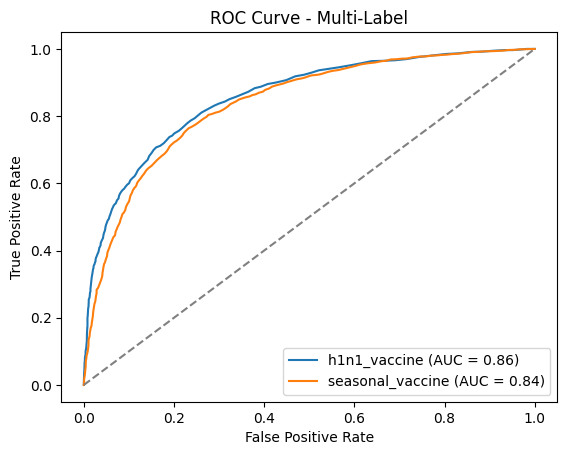

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_np = y_test.to_numpy()       # convert this to numpy since it is in pandas df 
# y_score_np = y_score.to_numpy()

for i, label in enumerate(["h1n1_vaccine", "seasonal_vaccine"]):
    fpr, tpr, _ = roc_curve(y_test_np[:, i], y_score[:, i])
    roc_auc = roc_auc_score(y_test_np[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Label')
plt.legend()
plt.show()

In [108]:
# True postive rate = TP/(TP+FN)
# False postive rate = FP/(FP+TN)

# Since my objective in this problem is to identify which individual should get the vaccine dosage, my aim should be to Increase the TPR and decrease the FPR